## This notebook is classify breast cancer data into benign and malignant

In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('data/breast_cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df['Unnamed: 32'].isnull().value_counts()

True    569
Name: Unnamed: 32, dtype: int64

In [7]:
data = df.iloc[:,1:-1]

In [8]:
data.shape

(569, 31)

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [81]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data['diagnosis']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

## Feature selection using correlation

In [82]:
corr = data.corr()
#corr

<AxesSubplot:>

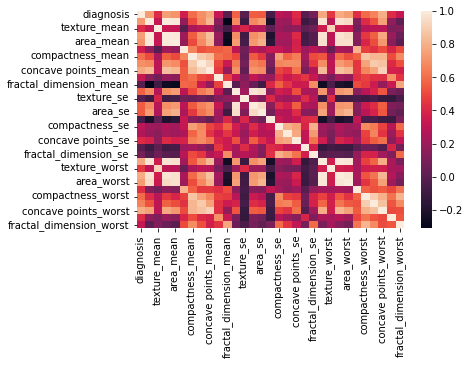

In [83]:
sns.heatmap(corr)

In [84]:
num_features = corr.shape[0]
columns = np.full((num_features,), True, dtype=bool)

for i in range(num_features):
    for j in range(i+1, num_features):
        if corr.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]
data = data[selected_columns]

In [85]:
data.shape

(569, 18)

In [86]:
y_data = pd.DataFrame()
y_data['diagnosis'] = data.iloc[:,0]

X_data = data.iloc[:,1:]

In [87]:
X_data.shape

(569, 17)

<function matplotlib.pyplot.show(close=None, block=None)>

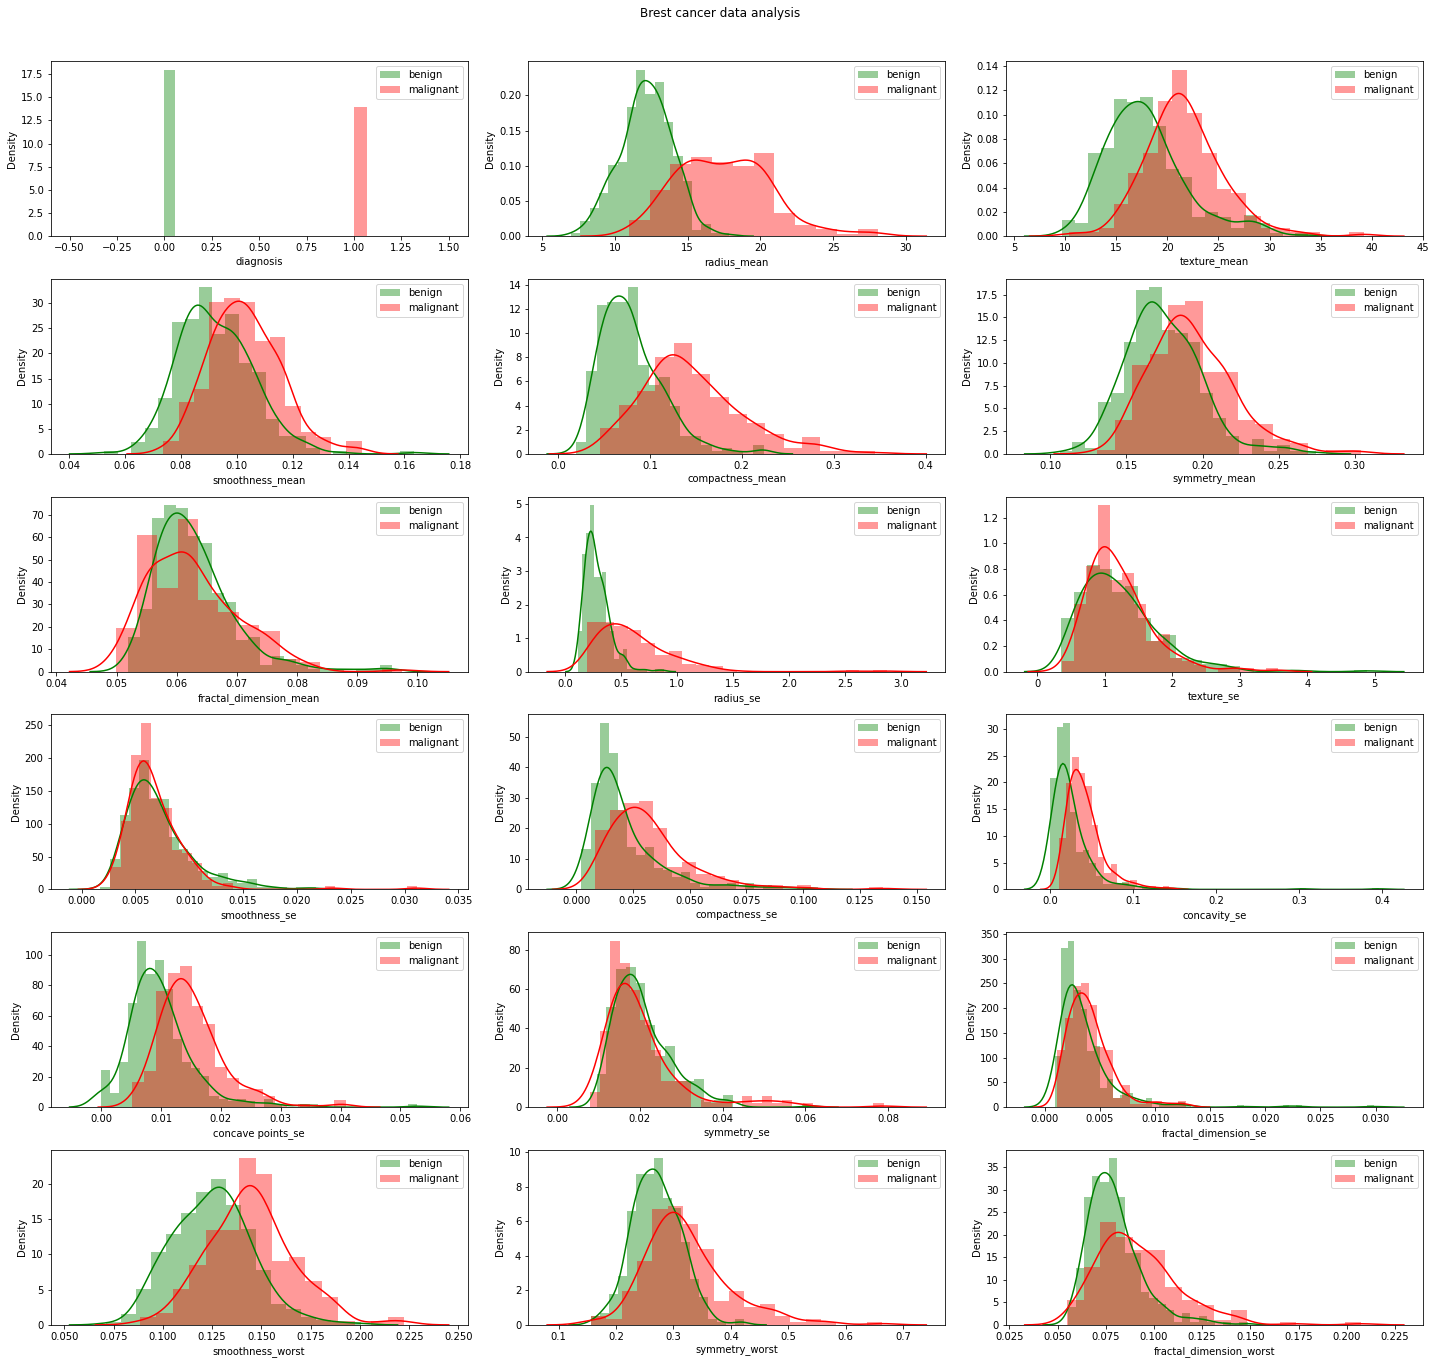

In [123]:
fig = plt.figure(figsize=(20, 25))
p = 1
for column in data.columns:
    plt.subplot(8, 3, p)
    p += 1
    sns.distplot(data[column][data['diagnosis'] == 0], color='g', label='benign')
    sns.distplot(data[column][data['diagnosis']==1], color='r', label='malignant')
    plt.legend(loc='best')
fig.suptitle('Brest cancer data analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show

In [112]:
## to find the best split
max_ = 0
best_seed = 0
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=i)
    svc = SVC()
    svc.fit(x_train, y_train)
    svc_preds = svc.predict(x_test)

    cm = confusion_matrix(y_test, svc_preds)
    acc = accuracy_score(y_test, svc_preds)
    if acc > max_:
        best_seed = i
    max_ = max(max_, acc)
print(best_seed)

41


In [113]:
x_train, x_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=best_seed)
svc = SVC()
svc.fit(x_train, y_train)
svc_preds = svc.predict(x_test)

cm = confusion_matrix(y_test, svc_preds)
acc = accuracy_score(y_test, svc_preds)
print(cm)
print(acc)

[[74  0]
 [ 4 36]]
0.9649122807017544


## Feature selection using ExtraTreesClassifier (ETC)

In [187]:
from sklearn.ensemble import ExtraTreesClassifier
dataETC = pd.read_csv('data/breast_cancer_data.csv')
dataETC = dataETC.iloc[:,1:-1]

label_encoder = LabelEncoder()
dataETC.iloc[:,0] = label_encoder.fit_transform(dataETC.iloc[:,0]).astype('float64')

xETC = dataETC.iloc[:,1:]
yETC = pd.DataFrame()
yETC['diagnosis'] = dataETC.iloc[:,0]
print(f'shape of x is: {xETC.shape} and shape of y is: {yETC.shape}')

shape of x is: (569, 30) and shape of y is: (569, 1)


In [188]:
model = ExtraTreesClassifier()
model.fit(xETC, yETC)
print(model.feature_importances_)
print(len(model.feature_importances_))

[0.06875132 0.02049982 0.05494612 0.04972998 0.00850766 0.03164772
 0.06293523 0.09162844 0.00766028 0.00580427 0.01919672 0.00546382
 0.02424884 0.02525576 0.00663598 0.00878235 0.00932639 0.0079927
 0.00581928 0.00703125 0.09960118 0.02293428 0.10582721 0.06549282
 0.01816182 0.01780463 0.0373915  0.08546428 0.01396142 0.01149693]
30


<AxesSubplot:>

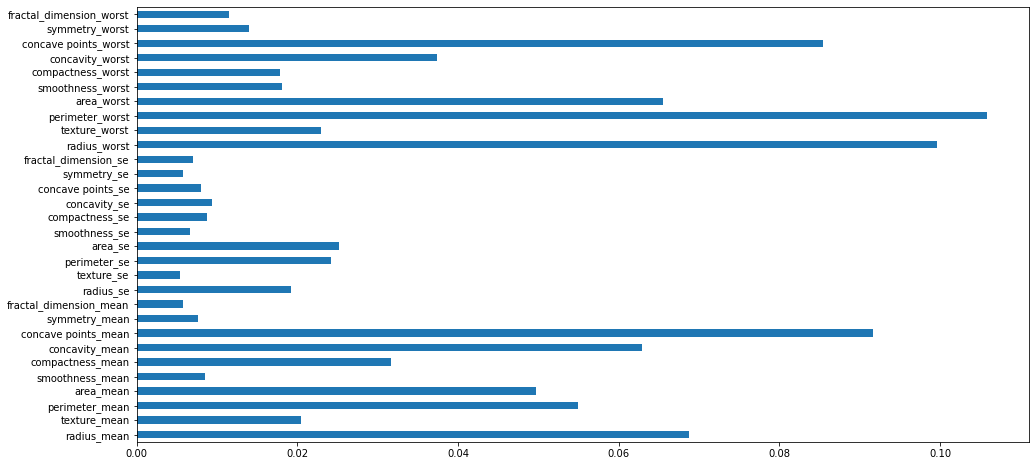

In [189]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.plot(kind='barh', figsize=(16,8))

<AxesSubplot:>

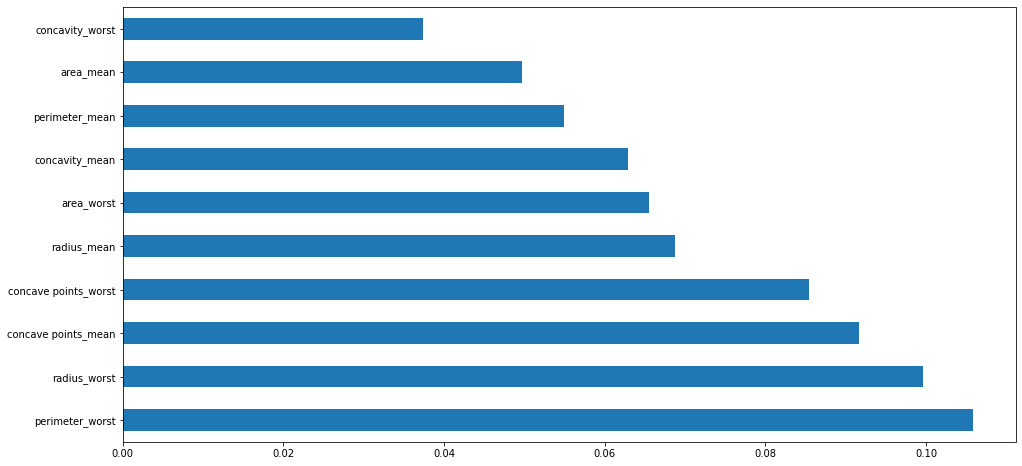

In [190]:
feature_importance.nlargest(10).plot(kind='barh', figsize=(16,8))

In [191]:
xETC= xETC[feature_importance.nlargest(10).index]
xETC.shape

(569, 10)

In [192]:
maxETC = 0
best_seed_ETC = 0
for i in range(100):
    xETC_train, xETC_test, yETC_train, yETC_test = train_test_split(xETC, yETC, test_size=0.2, random_state=i)
    svcETC = SVC()
    svcETC.fit(xETC_train, yETC_train)
    svcETC_preds = svcETC.predict(xETC_test)
    cmETC = confusion_matrix(yETC_test, svcETC_preds)
    accETC = accuracy_score(yETC_test, svcETC_preds)
    if accETC > maxETC:
        best_seed_ETC = i
    maxETC = max(maxETC, accETC)
print(best_seed_ETC)

60


In [193]:
xETC_train, xETC_test, yETC_train, yETC_test = train_test_split(xETC, yETC, test_size=0.2, random_state=best_seed_ETC)
svcETC = SVC()
svcETC.fit(xETC_train, yETC_train)
svcETC_preds = svcETC.predict(xETC_test)
cmETC = confusion_matrix(yETC_test, svcETC_preds)
accETC = accuracy_score(yETC_test, svcETC_preds)
print(cmETC)
print(accETC)

[[74  0]
 [ 3 37]]
0.9736842105263158


## Without feature selection

In [114]:
data_full = pd.read_csv('breast_cancer_data.csv')
data_full.shape

(569, 33)

In [115]:
data_full = data_full.iloc[:,1:-1]

In [116]:
label_encoder = LabelEncoder()
data_full.iloc[:,0] = label_encoder.fit_transform(data_full.iloc[:,0]).astype('float64')

In [117]:
y_data_full = pd.DataFrame()
y_data_full['diagnosis'] = data_full.iloc[:,0]

print(y_data_full['diagnosis'].value_counts())

X_data_full = data_full.iloc[:,1:]

print(X_data_full.shape, y_data_full.shape)


0.0    357
1.0    212
Name: diagnosis, dtype: int64
(569, 30) (569, 1)


In [118]:
max_ = 0
best_seed_full = 0
for i in range(100):
    x_train_full, x_test_full, y_train_full, y_test_full = \
        train_test_split(X_data_full,y_data_full, test_size=0.2, random_state=i)
    svc_full = SVC()
    svc_full.fit(x_train_full, y_train_full)
    svc_full_preds = svc_full.predict(x_test_full)
    cm_full = confusion_matrix(y_test_full, svc_full_preds)
    acc_full = accuracy_score(y_test_full, svc_full_preds)
    if acc_full > max_:
        best_seed_full = i
    max_ = max(max_, acc_full)
print(best_seed_full)

0


In [120]:
x_train_full, x_test_full, y_train_full, y_test_full = \
    train_test_split(X_data_full,y_data_full, test_size=0.2, random_state=best_seed_full)
svc_full = SVC()
svc_full.fit(x_train_full, y_train_full)
svc_full_preds = svc_full.predict(x_test_full)
cm_full = confusion_matrix(y_test_full, svc_full_preds)
acc_full = accuracy_score(y_test_full, svc_full_preds)
print(cm_full)
print(acc_full)

[[66  1]
 [ 7 40]]
0.9298245614035088
